# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from prettytable import PrettyTable

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 16,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}
plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

np.random.seed(307)

In [95]:
from stuff import (
    get_divergences_scores_eigvals,
    sufficient_sample_size,
    sufficient_vs_threshold,
    get_regression_results
)

from data import (
    synthetic_regression,
    liver_disorders,
    get_datasets_regression,
    get_datasets_regression_info
)

from visualize import (
    plot_eigvals,
    plot_divergences_scores,
    plot_sufficient_vs_threshold
)

# Synthetic regression

In [3]:
# set number of samples and features in synthetic dataset
n_samples = 500
n_features = 10

In [4]:
X_synthetic, y_synthetic = synthetic_regression()

In [5]:
# set parameters for prior distribution
alpha = 1
mu_0 = np.zeros(n_features)
Sigma_0 = 1 / alpha * np.identity(n_features)

In [6]:
divergences_synthetic, scores_synthetic, eigvals_synthetic = get_divergences_scores_eigvals(
    mu_0=mu_0,
    Sigma_0=Sigma_0,
    X=X_synthetic,
    y=y_synthetic,
    B=100
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
sample_sizes_synthetic = np.arange(X_synthetic.shape[1]+1, X_synthetic.shape[0])
thresholds_synthetic = np.logspace(-3, 1, 1000)
sufficient_synthetic = sufficient_vs_threshold(sample_sizes=sample_sizes_synthetic,
                                                divergences=divergences_synthetic,
                                                scores=scores_synthetic,
                                                thresholds=thresholds_synthetic)

# Liver Disorders

In [8]:
X, y = liver_disorders()
n_samples = X.shape[0]
n_features = X.shape[1]

In [9]:
# set parameters for prior distribution
alpha = 1
mu_0 = np.zeros(n_features)
Sigma_0 = 1 / alpha * np.identity(n_features)

In [10]:
divergences, scores, eigvals = get_divergences_scores_eigvals(mu_0=mu_0,
                                                              Sigma_0=Sigma_0,
                                                              X=X,
                                                              y=y,
                                                              B=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [11]:
sample_sizes = np.arange(X.shape[1]+1, X.shape[0])
thresholds = np.logspace(-3, 2, 1000)
sufficient = sufficient_vs_threshold(sample_sizes=sample_sizes,
                                    divergences=divergences,
                                    scores=scores,
                                    thresholds=thresholds)

# Different datasets

In [12]:
datasets_regression, datasets_regression_names = get_datasets_regression()

  0%|          | 0/13 [00:00<?, ?it/s]

In [13]:
divergences_regression = {}
scores_regression = {}
num_sample_size = 50 # for computational simplicity
B = 100

for name in tqdm(datasets_regression_names.values()):
    
    #print(name)
    n_samples, n_features = datasets_regression[name][0].shape
    
    # set parameters for prior distribution
    alpha = 1
    mu_0 = np.zeros(n_features)
    Sigma_0 = 1 / alpha * np.identity(n_features)
    
    divergences_regression[name], scores_regression[name], _ = get_divergences_scores_eigvals(
        mu_0=mu_0,
        Sigma_0=Sigma_0,
        X=datasets_regression[name][0],
        y=datasets_regression[name][1],
        B=B,
        num_sample_size=num_sample_size
    )

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [98]:
divergences_regression_normalized = {}
for key, val in divergences_regression.items():
    divergences_regression_normalized[key] = val / max(val)
    
scores_regression_normalized = {}
for key, val in scores_regression.items():
    scores_regression_normalized[key] = 1 - (1 - val) / max(1 - val)

In [110]:
eps = 0.5

table = get_regression_results(eps, num_sample_size, 
                               datasets_regression, datasets_regression_names,
                               divergences_regression_normalized, scores_regression_normalized)

table

Dataset,KL-sufficient,S-sufficient
Abalone,3751,3751
Auto MPG,55,inf
Automobile,152,inf
Liver Disorders,282,inf
Servo,138,160
Forest Fires,487,inf
Wine Quality,inf,inf
Energy Efficiency,inf,inf
Student Performance,inf,inf
Facebook Metrics,379,475


In [96]:
get_datasets_regression_info()

  0%|          | 0/13 [00:00<?, ?it/s]

Dataset,# objects,# features
Abalone,4177,8
Auto MPG,392,8
Automobile,159,25
Liver Disorders,345,6
Servo,167,4
Forest Fires,517,12
Wine Quality,6497,12
Energy Efficiency,768,9
Student Performance,649,32
Facebook Metrics,495,18


# Plots

Minimum eigenvalues of $\mathbf{X}_k^\top \mathbf{X}_k$

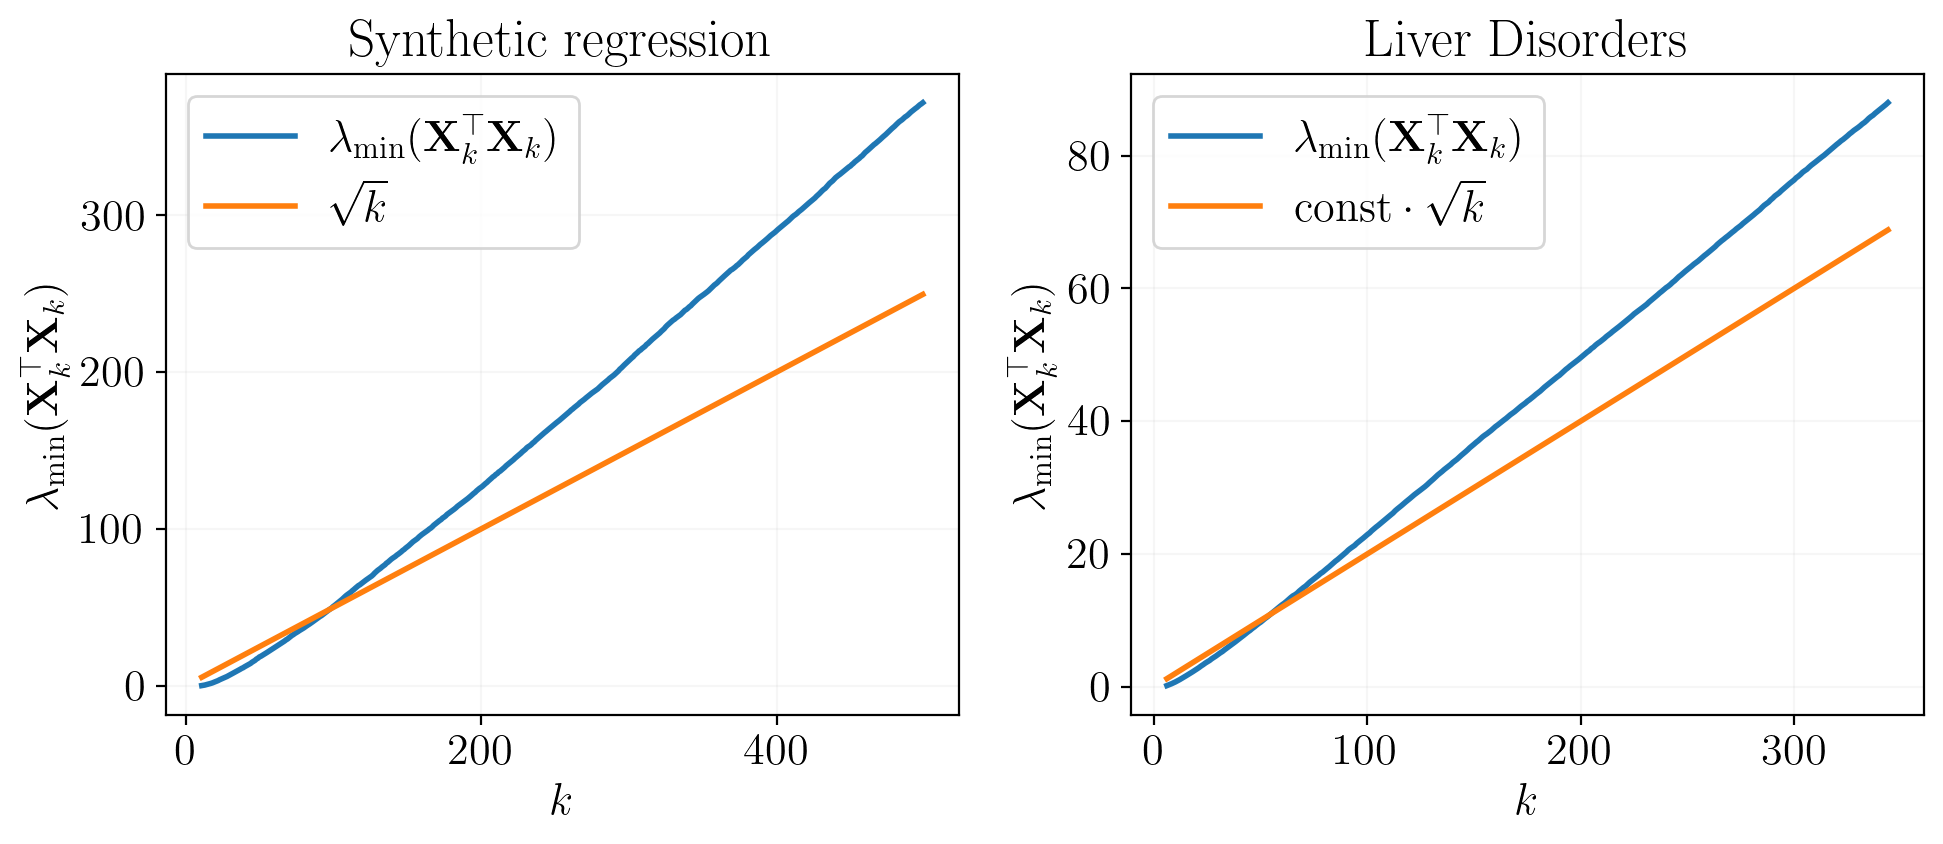

In [15]:
plot_eigvals(sample_sizes_synthetic=sample_sizes_synthetic,
             sample_sizes=sample_sizes,
             eigvals_synthetic=eigvals_synthetic,
             eigvals=eigvals,
             save=True,
             filename="figs/eigvals.pdf")

Synthetic regression

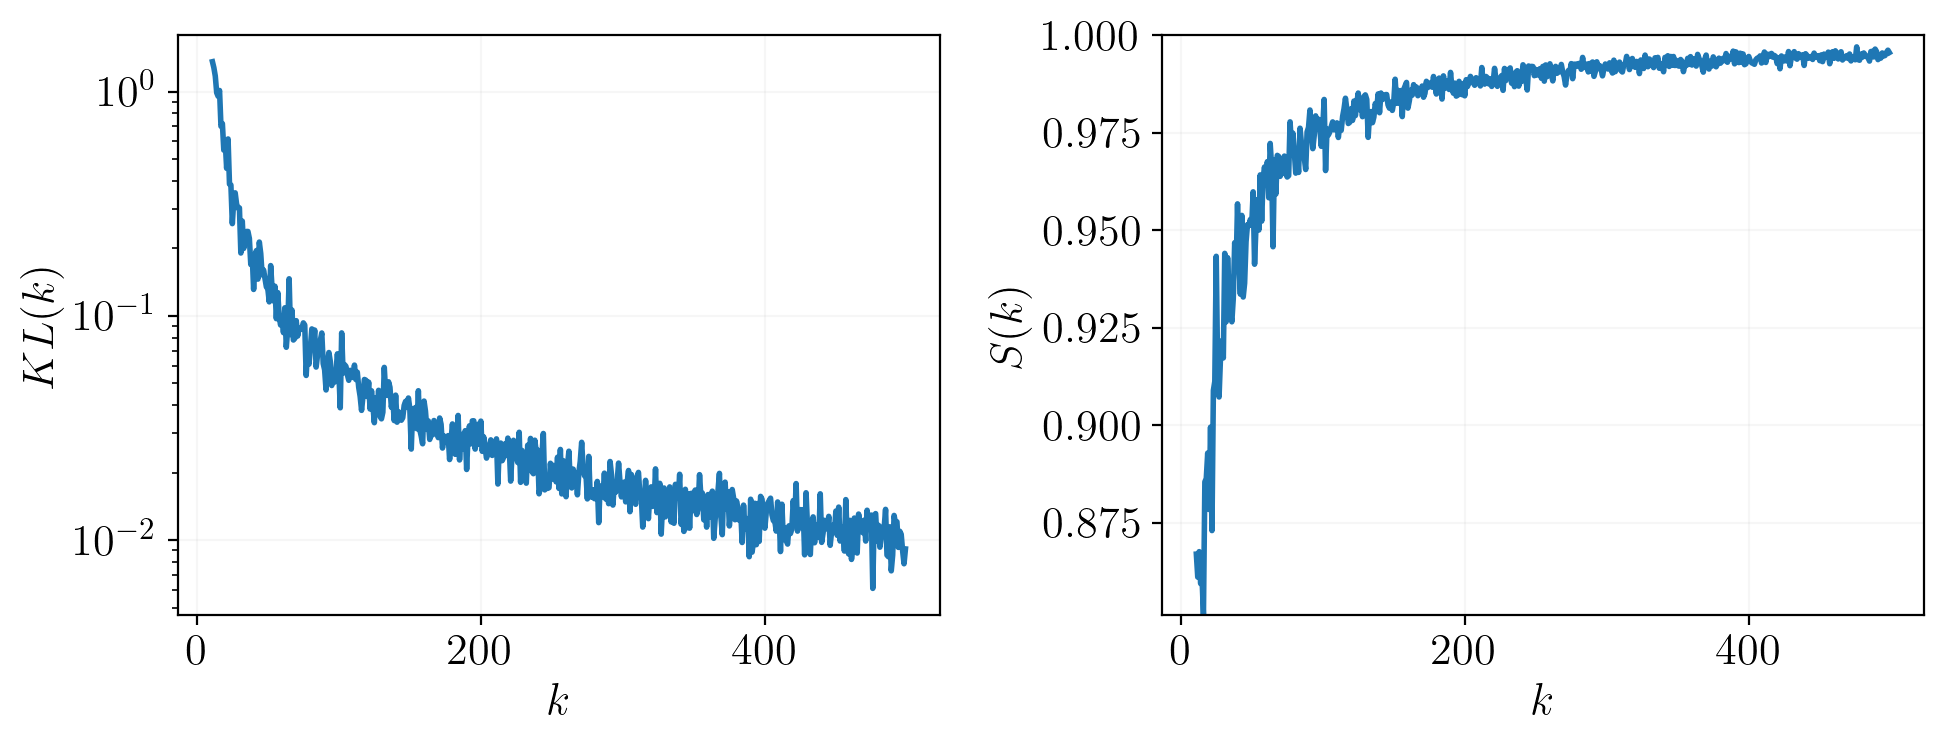

In [16]:
plot_divergences_scores(sample_sizes=sample_sizes_synthetic,
                        divergences=divergences_synthetic,
                        scores=scores_synthetic,
                        save=True, 
                        filename="figs/synthetic-regression.pdf")

Liver Disorders

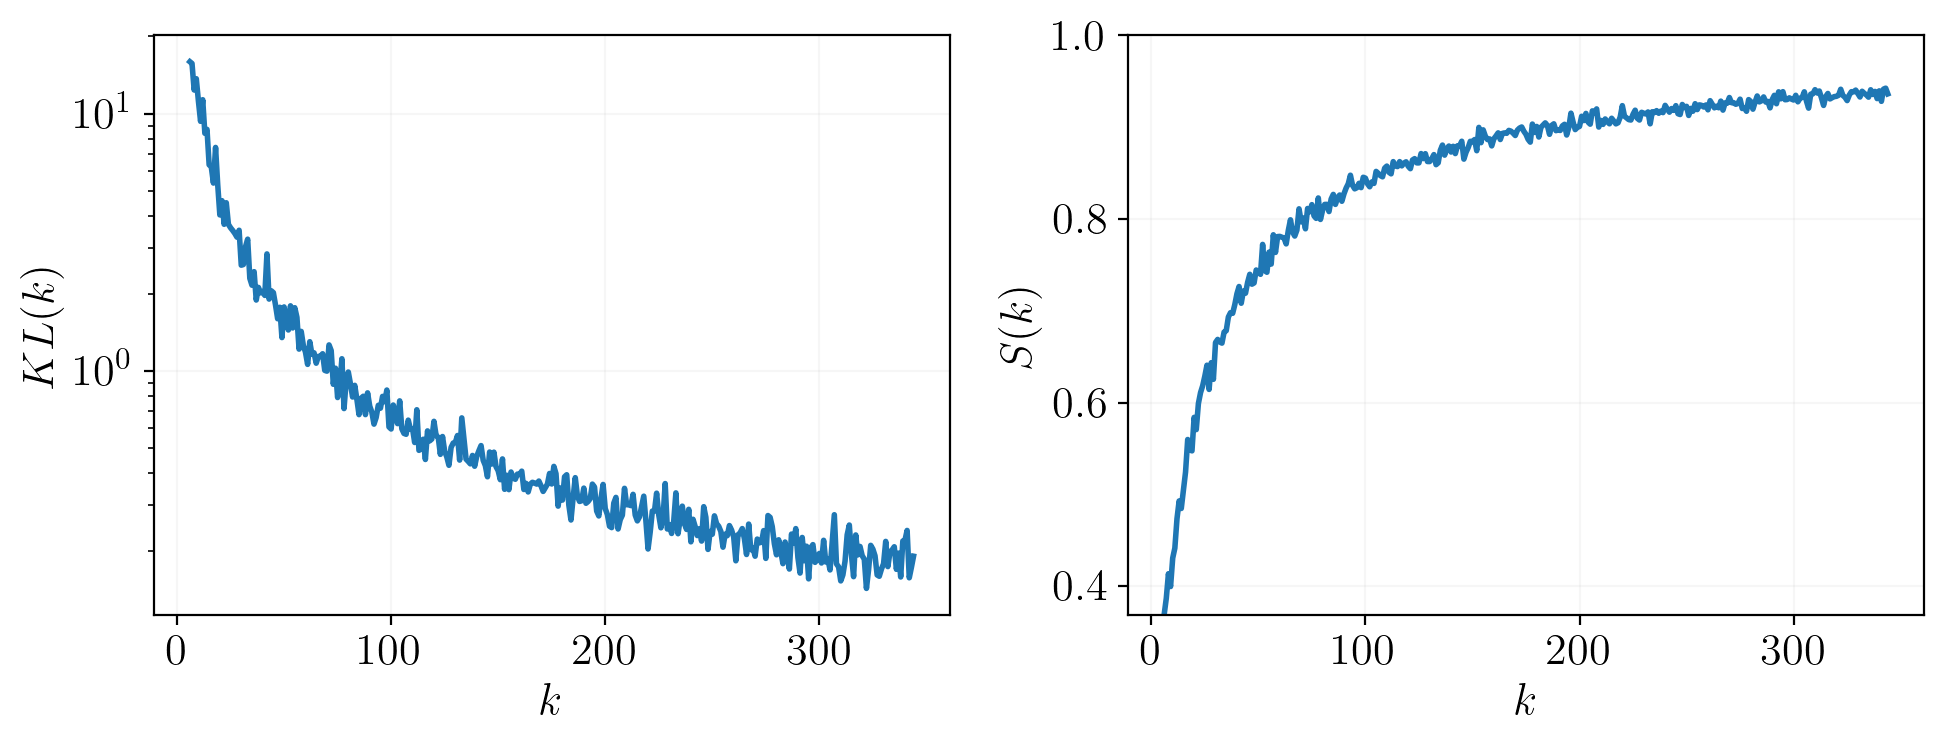

In [17]:
plot_divergences_scores(sample_sizes=sample_sizes,
                        divergences=divergences,
                        scores=scores,
                        save=True, 
                        filename="figs/liver-disorders.pdf")

Sufficient sample size vs threshold

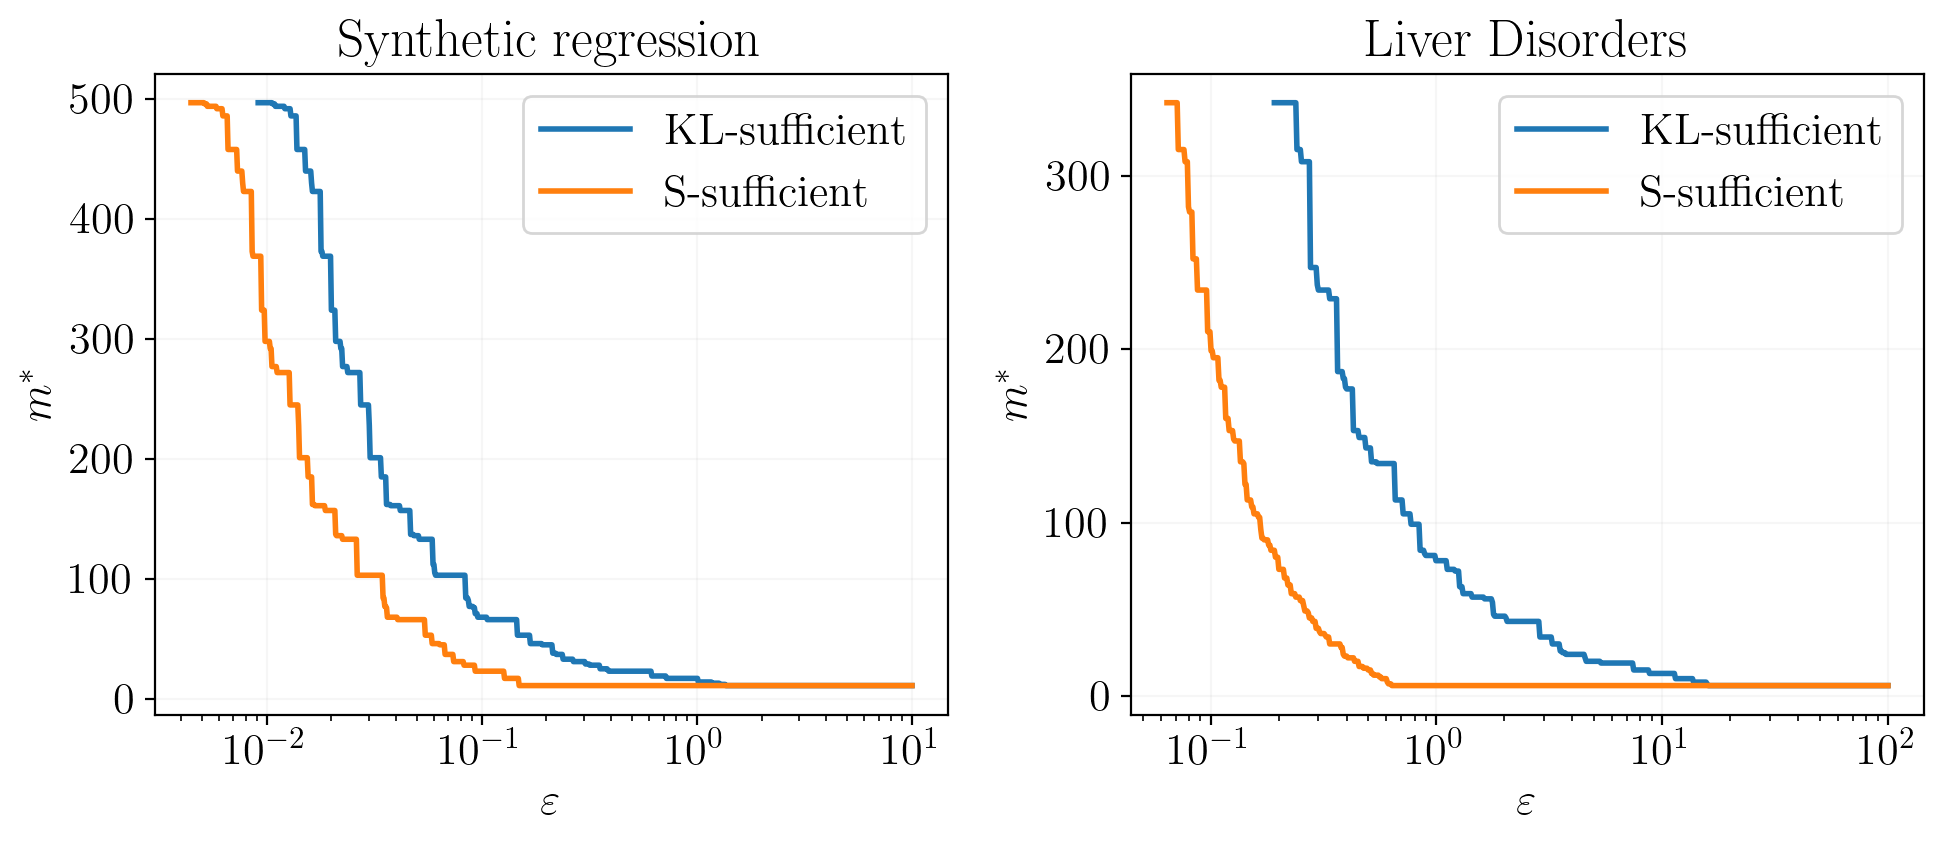

In [18]:
plot_sufficient_vs_threshold(thresholds_synthetic=thresholds_synthetic,
                             sufficient_synthetic=sufficient_synthetic,
                             thresholds=thresholds,
                             sufficient=sufficient,
                             save=True,
                             filename="figs/sufficient-vs-threshold.pdf")